In [1]:
from fastai.vision import *


D:\Anaconda\envs\fastai_conda\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
folders=[]
folders.append('Charmender')
folders.append('Squirtle')
folders.append('Bulbasaur')
files=[]
files.append('Charmender.csv')
files.append('Squirtle.csv')
files.append('Bulbasaur.csv')



In [3]:
path=Path('data/Pokemon')
for folder in folders:
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)

In [4]:
path=Path('data/Pokemon')
i=0
for folder in folders:
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)
    st=os.path.join(dest, files[i])
    download_images(st, dest, max_pics=250)
    i+=1

path.ls()
classes = ['Charmender','Squirtle','Bulbasaur']

In [5]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)


Charmender


Squirtle


Bulbasaur


In [6]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=0,bs=32).normalize(imagenet_stats)


(['Bulbasaur', 'Charmender', 'Squirtle'], 3, 840, 210)

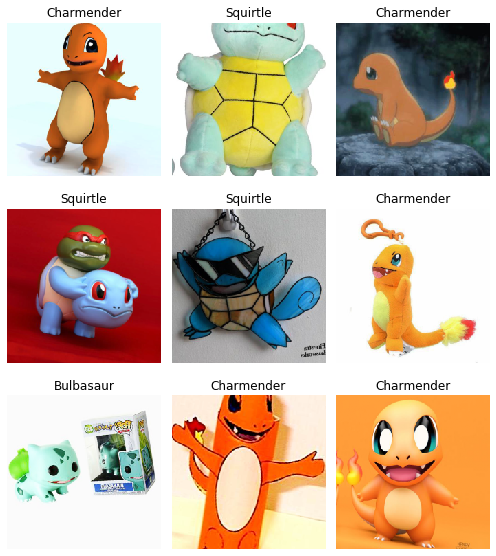

In [7]:
data.show_batch(rows=3, figsize=(7,8))
data.classes, data.c, len(data.train_ds), len(data.valid_ds)



In [8]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


In [9]:
learn.fit_one_cycle(5)


epoch,train_loss,valid_loss,error_rate,time
0,1.179452,0.530387,0.157143,00:37
1,0.779259,0.533692,0.147619,00:24
2,0.592353,0.445359,0.147619,00:24
3,0.465057,0.507599,0.138095,00:25
4,0.393432,0.488676,0.142857,00:25


In [10]:
learn.save('stage-1')

In [11]:
learn.unfreeze()


In [12]:
learn.lr_find(start_lr=3e-5, end_lr=3e-4)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


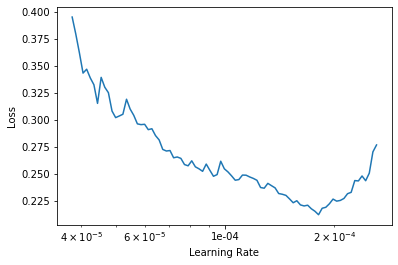

In [13]:
learn.recorder.plot()


In [14]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))


epoch,train_loss,valid_loss,error_rate,time
0,0.404174,0.482798,0.100000,00:27
1,0.334502,0.427209,0.114286,00:27
